In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Research Questions:

Overall Goal: Assess the impact of the "bubble" on team performance.
In order to finalize these questions, we took a close look at the results of our exploratory analysis to identify variables that seem to have interesting potential correlations with teams' success in the playoffs. 

- How does home court advantage (playoff seeding) affect performance and success in the playoffs? 
- Does the absence of fans have a negative affect on home team performance in the bubble?
- Does the absence of fans have an effect on players' emotions throughout games, and is this reflected in the number fouls called?
- What is the impact of the bubble on older, more experienced teams, vs younger teams?
- Do teams that spend more money on player salaries have more success?
- Has the bubble had an effect on players' focus, and is this reflected more in offensive or defensive performance?
- Which traditional and advanced statistics are most useful in predicting teams' success in the playoffs?
- Do teams with better teamwork (reflected in assist and turnover stats) have more success in the bubble and the playoffs?

## Data Cleaning:

Since we collected 8 subsets of data, and 2 additional supplementary datasets, we had to process and clean the data, as decribed in the following steps. The 8 subsets include: 2020 regular season pre-bubble stats, 2020 post-bubble regular season stats, 2020 playoff stats, and 2019 playoff stats. These datasets were originally split between 2 datasets each, one for traditional statistics and one for advanced statistics. 

The following steps were completed separately for each data subset (2020 playoffs, 2020 regular season inside bubble, 2020 regular season outside bubble, 2019 playoffs)

- Combine data from "traditional statistics" and "advanced statistics" datasets using an inner join on the "Team" attribute. This allows us to look at all relevant data for each subset in a single dataframe, and reduces our number of dataframes from 8 to 4.
- Drop unnecessary row at the top of raw data file, if necessary
- Drop extra columns that are repeated in both traditional and advanced statistics, since these are now combined. These columns include Games Played (GP), Wins (W), and Losses (L).
- Rename columns whose names changed as a result of the inner join. These columns had the same name, but sometimes contained different data since traditional stats show averages while advanced stats show totals. These columns include Games Played (GP), Wins (W), Losses (L), Average Minutes per Game (MIN), and Total Minutes (Total Mins).
- For the 3 2020 data subsets only: using supplementary datasets, add columns to raw data that contain information about team age, experience, and salary. Edit the values in the salary column so the data can be stored as floats, instead of strings.
- For the 2020 regular season outside bubble data subset only: Drop the rows that contain information about teams that did not qualify for the playoffs. We are interested in analyzing how the bubble affects performance, so we do not need data about teams that were not invited to the bubble and did not qualify for the playoffs.
- For the 2 playoff data subsets only: manually add columns containing data about teams' conference and playoff seeds. This was done using information from the internet about teams' conference assignment (West or East), and the playoff seed they earned (1-8). Also, add a column with information about the Teams' final ranking. This will be used to evaluate overall performance in the playoffs.

The final dataframes should contain all necessary data to identify factors that affect team performance in the bubble and in the playoffs.

## Data Description

Our data was collected from NBA.com, where we filtered by date and game type (regular season/playoffs) to collect the specific data we were interested in analyzing. In order to get the data into Jupyter Notebook, we copied and pasted it from NBA.com into an excel file, which we then read into the notebook as separate sheets in the file. After performing some initial analysis on this data, we decided to supplement it with data collected from https://en.hispanosnba.com/teams/comparison, which we copied into the excel file as well. This data provides information about salaries, ages, and experience that we thought would be valuable for our analyses. 

We have provided answers to relevant questions from the “Datasheets for Datasets” document, as follows.

What are the observations (rows) and the attributes (columns)?
- The observations are teams in the NBA and the columns are the various metrics that the league tracks, such as wins, losses, points, etc.

What processes might have influenced what data was observed and recorded and what was not?
- All data from NBA games should have been observed and processed by NBA record keepers. We have assumed that they collected all necessary data and recorded it accurately.

What preprocessing was done, and how did the data come to be in the form that you are using?
- The data was collected from the official NBA website, where it was already formatted and relatively easy to use. We did have to do some editing ourselves, including removing attributes and rows that were unnecessary for our analysis, and by adding some data that we thought would be valuable.

If people are involved, were they aware of the data collection and if so, what purpose did they expect the data to be used for?
- NBA players are involved in the collection of this data, and presumably knew that it would be collected for analytics purposes. They likely expect this data to be used by teams and the league for extensive analysis of gameplay. 

Where can your raw source data be found, if applicable? Provide a link to the raw data (hosted in a Cornell Google Drive or Cornell Box). 
- Our raw data is from nba.com and from https://en.hispanosnba.com/teams/comparison, and our specific data can be found at https://drive.google.com/file/d/1RO9HCChrXBuv_nQw8GpfUq-LTqtmp33Y/view?usp=sharing. 

For what purpose was the dataset created? 
- The dataset was created for use by the NBA and for consumption by fans, teams, and other entities. The data was created so that the league and teams could perform analysis that can potentially lead to enhancements in future gameplay.

Who created the dataset (e.g., which team, research group) and on behalf of which entity (e.g., company, institution, organization)? 
- The NBA created the dataset on behalf of itself.

Who funded the creation of the dataset? 
- The NBA funded the creation of the dataset.

What do the instances that comprise the dataset represent (e.g., documents, photos, people, countries)?
- The instances represent gameplay performance by individual NBA players that have been aggregated and averaged by team.

Are there multiple types of instances (e.g., movies, users, and ratings; people and interactions between them; nodes and edges)? Please provide a description. How many instances are there in total (of each type, if appropriate)?.
- The data doesn’t necessarily have multiple types of instances or interactions between them, but it should be noted that the data recorded about each team does have an effect on the rest of the data, i.e. a team’s defensive statistics are affected by other teams’ offensive statistics, and vice versa. 

Is any information missing from individual instances? If so, please provide a description, explaining why this information is missing (e.g., because it was unavailable). This does not include intentionally removed information, but might include, e.g., redacted text.
- There doesn’t seem to be any missing data; the NBA does a good job producing comprehensive and complete datasets. 

Does the dataset relate to people? If not, you may skip the remaining questions in this section.
- The dataset relates to professional basketball players.

Does the dataset identify any subpopulations (e.g., by age, gender)? If so, please describe how these subpopulations are identified and provide a description of their respective distributions within the dataset.
- The dataset does contain information about the average age of NBA players on each team, but does not have information about ages of individuals. The average age across teams is nearly normally distributed, with a fairly small range of values (between about 24-30). The data also includes information about average salaries of players on each team, which is similarly normally distributed and has a small range of values (between 5 and 10 million USD). 

Is it possible to identify individuals (i.e., one or more natural persons), either directly or indirectly (i.e., in combination with other data) from the dataset? If so, please describe how.
- There is not a way to identify specific individuals from our dataset, because the observations are averages from teams of about 15 people. We did not use any individual player data, since team data should be more useful for producing insights about overall team performance, which is what we are most interested in. 

How was the data associated with each instance acquired? Was the data directly observable (e.g., raw text, movie ratings), reported by subjects (e.g., survey responses), or indirectly inferred/derived from other data (e.g., part-of-speech tags, model-based guesses for age or language)? If data was reported by subjects or indirectly inferred/derived from other data, was the data validated/verified? If so, please describe how. • What mechanisms or procedures were used to collect the data (e.g., hardware apparatus or sensor, manual human curation, software program, software API)? How were these mechanisms or procedures validated? 
- The data was collected directly by NBA statisticians based on box scores from individual games (collected by scorekeepers), and likely processed by software programs to aggregate and average data across all teams. The NBA also uses game recordings to confirm data and conduct further analysis to generate advanced stats. 

Who was involved in the data collection process (e.g., students, crowdworkers, contractors) and how were they compensated (e.g., how much were crowdworkers paid)?
- NBA employees are directly responsible for data collection, and are likely compensated at a salary of between $30,000 and $70,000 (multiple sources, unconfirmed).

Over what timeframe was the data collected? Does this timeframe match the creation timeframe of the data associated with the instances (e.g., recent crawl of old news articles)? If not, please describe the timeframe in which the data associated with the instances was created.
- The data we are using was all collected within the last 20 months, and exactly matches the creation timeframe of the data since it is collected immediately as it is produced. 

Does the dataset relate to people? If not, you may skip the remainder of the questions in this section.
- It relates to NBA players. 

Did you collect the data from the individuals in question directly, or obtain it via third parties or other sources (e.g., websites)?
- We collected it from the NBA website.

Were the individuals in question notified about the data collection? If so, please describe (or show with screenshots or other information) how notice was provided, and provide a link or other access point to, or otherwise reproduce, the exact language of the notification itself.
- Although we do not have exact confirmation of this, we presume that NBA players are notified in their contracts that their gameplay data will be collected.

Did the individuals in question consent to the collection and use of their data? If so, please describe (or show with screenshots or other information) how consent was requested and provided, and provide a link or other access point to, or otherwise reproduce, the exact language to which the individuals consented.
- Again, we do not have precise confirmation of players’ consent, but assume that they consented to this when they signed their contacts.

Has the dataset been used for any tasks already? If so, please provide a description.
- Unclear, but has likely undergone some analysis by the league and teams.

What (other) tasks could the dataset be used for?
- It will likely primarily be used to derive insights about performance that can be used to improve gameplay. 

Are there tasks for which the dataset should not be used? If so, please provide a description.
- It should not be used to identify any long-term patterns in performance, because it only contains information about a short time frame. It should also not be used to analyze individual player performance, since all data has been aggregated by team. 


## Data Limitations

Fortunately, our data is seemingly complete, since the NBA should have been able to record all of these statistics accurately. However, there are some limitations we must be aware of. 


- This data is on the team's averages, not specific games. While it does include a variety of statistics, it may make it more difficult to test specific things, such as the effect of home-court advantage, as this data will only show the aggregate and averages. 
- Basketball games are by nature somewhat unpredictable, with any given player able to play well on a certain night, so it is important to remember that this data comes from human beings playing a sport
- We only have a year and a half of data, so it may be difficult to analyze long-term trends. Any results from our analysis will be very difficult to prove any sort of causation, but we hope to find meaningful correlations. 
- The regular season bubble data is from only 8 games, which affects the data. There were only 8 regular-season games in the bubble, but still, it is harder to detect trends from a smaller sample. 
- We have some preconceived notions about how players may have been affected by the bubble, but we must be aware of these and make sure they do not affect our conclusions and interpretion of our results. 
- The playoffs are still going on as of now, and we will need to update our 2020 playoff data to reflect the changes that occur after we submit this.


## Questions for Reviewers
- Would it be worth collecting more data (by game/by player) so we have more observations to analyze? 
- We are planning to do some linear regression analyses, but were wondering if you had other thoughts on analysis methods that would be useful to include
- Do we have too many/too few research questions?
- Are there any other attributes that may be interesting to look at?
- Should we continue to drop columns that we don't think will drive interesting analyses? We have over 40 columns in each dataframe, so it may make sense to get rid of some that we may not need.
- Are there other limitations we should be aware of? The most glaring ones have to do with the number of rows we have, but since the data is complete and was fairly clean in its raw state, we are hopeful that the data will be useful and straightforward to analyze. 

## Data Cleaning Code

2020 Playoff Data cleaning Inside Bubble

In [24]:
df = pd.read_excel('nbadata2950.xlsx', sheet_name='bubbleplayofftrad')
cf= pd.read_excel('nbadata2950.xlsx', sheet_name='bubbleplayoffadv')
df=df.drop(['Unnamed: 0'], axis=1)
cf=cf.drop(['Unnamed: 0'], axis=1)
res = cf.merge(df, how='inner', on='TEAM')
res=res.drop(columns=['GP_y', 'W_y', 'L_y'])
res=res.rename(columns={"GP_x": "GP", "W_x": "W", "L_x": "L", "MIN_x": "MIN", 'MIN_Y': 'Total Mins'})
res['avg_salary'] = res['avg_salary'].str.replace('$', '')
res['avg_salary'] = res['avg_salary'].str.replace('M', '')
res['avg_salary']=res['avg_salary'].astype(float)
conf=['W','E','E','W','W','E','W','E','W','W','W','E','W','E','E','E']
ranc=[1,5,3,3,2,2,4,1,5,6,7,8,8,7,4,6]
res['conf']=conf
res['seed']=ranc
res.insert(0, "Final Rank", [i for i in range(1,17)])
res

,Final Rank,TEAM,GP,W,L,MIN,OFFRTG,DEFRTG,NETRTG,AST%,...,PFD,+/-,players,avg_height,avg_weight,avg_age,avg_exp,avg_salary,conf,seed
0,1,Boston Celtics,17,10,7,831,111.6,106.3,5.3,58.7,...,22.0,5.0,15,197.1,100.9,25.3,2.7,7.8,W,1
1,2,Brooklyn Nets,4,0,4,192,102.4,122.9,-20.4,71.0,...,22.5,-20.5,15,201.7,99.7,26.8,5.3,8.0,E,5
2,3,Dallas Mavericks,6,2,4,293,112.1,121.4,-9.3,51.0,...,24.5,-9.7,15,200.9,100.3,27.6,4.7,7.9,E,3
3,4,Denver Nuggets,19,9,10,917,112.6,115.0,-2.4,58.0,...,22.1,-2.3,15,200.9,101.7,26.1,4.1,8.5,W,3
4,5,Houston Rockets,12,5,7,581,107.7,106.8,0.8,57.0,...,18.6,0.8,16,196.7,98.0,30.1,8.3,8.0,W,2
5,6,Indiana Pacers,4,0,4,192,103.9,112.7,-8.8,61.6,...,15.8,-10.5,15,199.4,97.0,25.7,3.5,7.5,E,2
6,7,LA Clippers,13,7,6,629,114.4,110.1,4.2,51.7,...,22.3,4.2,15,199.1,98.5,28.3,6.1,8.8,W,4
7,8,Los Angeles Lakers,18,14,4,864,116.1,108.8,7.2,62.9,...,22.9,7.1,16,198.6,100.8,29.6,8.5,7.2,E,1
8,9,Miami Heat,18,13,5,874,113.5,110.5,3.0,66.1,...,23.2,3.2,15,200.5,101.3,27.6,5.5,8.6,W,5
9,10,Milwaukee Bucks,10,5,5,485,109.1,107.3,1.8,60.6,...,21.2,1.2,15,200.5,103.3,29.7,7.7,8.2,W,6


Regular Season 2019-2020 8 games Inside Bubble (data cleaning)

In [25]:
bubble_reg_trad = pd.read_excel("nbadata2950.xlsx", sheet_name="bubbleregtrad")
bubble_reg_adv= pd.read_excel("nbadata2950.xlsx", sheet_name="bubbleregadv")
bubble_reg=pd.merge(bubble_reg_trad, bubble_reg_adv, how='inner', on='TEAM')

bubble_reg=bubble_reg.drop(columns=['GP_y', 'W_y', 'L_y', 'Unnamed: 0_x'])
bubble_reg=bubble_reg.rename(columns={"GP_x":"GP", "W_x": "W", "L_x": "L", "MIN_x": "MIN"})
bubble_reg['avg_salary'] = bubble_reg['avg_salary'].str.replace('$', '')
bubble_reg['avg_salary'] = bubble_reg['avg_salary'].str.replace('M', '')
bubble_reg['avg_salary']=bubble_reg['avg_salary'].astype(float)
bubble_reg

,TEAM,GP,W,L,WIN%,MIN,PTS,FGM,FGA,FG%,...,AST/TO,AST RATIO,OREB%,DREB%,REB%,TOV%,EFG%,TS%,PACE,PIE
0,Boston Celtics,8,5,3,0.625,48.6,118.9,42.1,89.1,47.3,...,1.61,17.5,28.0,72.4,51.0,15.0,55.0,59.1,101.06,52.8
1,Brooklyn Nets,8,5,3,0.625,48.0,119.9,43.8,91.9,47.6,...,2.09,19.4,24.6,72.9,48.5,12.8,55.6,58.7,103.25,49.8
2,Dallas Mavericks,8,3,5,0.375,49.9,122.5,42.1,93.1,45.2,...,2.18,18.0,27.0,76.0,50.7,11.5,52.6,57.6,100.81,48.2
3,Denver Nuggets,8,3,5,0.375,49.9,118.5,43.8,88.8,49.3,...,1.98,19.9,29.2,70.6,49.8,14.2,55.9,59.5,97.50,49.6
4,Houston Rockets,8,4,4,0.500,48.6,115.3,38.0,88.6,42.9,...,1.54,16.3,15.3,70.5,42.7,13.6,52.8,57.5,107.35,47.0
5,Indiana Pacers,8,6,2,0.750,48.0,110.3,41.9,89.1,47.0,...,1.77,18.3,21.8,68.9,46.4,13.9,53.6,56.6,102.38,52.3
6,LA Clippers,8,5,3,0.625,48.6,117.6,41.0,85.8,47.8,...,1.73,16.9,23.0,76.4,51.1,12.9,56.3,60.3,100.32,53.4
7,Los Angeles Lakers,8,3,5,0.375,48.0,106.4,37.8,86.3,43.8,...,1.37,15.7,27.7,76.1,49.9,15.5,49.5,53.7,101.88,45.6
8,Memphis Grizzlies,8,2,6,0.250,48.6,112.6,40.9,90.1,45.4,...,1.72,18.1,24.9,75.4,50.1,14.4,51.5,55.5,103.77,50.1
9,Miami Heat,8,3,5,0.375,48.0,111.1,38.0,84.3,45.1,...,1.69,18.5,23.7,73.1,48.2,14.9,53.3,58.1,100.69,51.4


Regular Season 2019-2020 before covid (data cleaning)

In [26]:
trad_stats = pd.read_excel('nbadata2950.xlsx', sheet_name='outregtrad')
adv_stats = pd.read_excel('nbadata2950.xlsx', sheet_name='outregadv')
trad_stats = trad_stats.drop([13])
trad_stats = trad_stats.drop(trad_stats.index[17:29])
adv_stats = adv_stats.drop([13])
adv_stats = adv_stats.drop(adv_stats.index[17:29])
trad_stats = pd.merge(trad_stats,adv_stats, how = 'inner', on = 'TEAM')
trad_stats = trad_stats.drop(columns=['GP_y','W_y','L_y'])
trad_stats = trad_stats.rename(columns={'Unnamed: 0_x': 'RANK','GP_x': 'GP','W_x' :'W','L_x':'L','MIN_x': 'MPG', 'MIN_y' :'TMIN'})
stats = trad_stats
stats['avg_salary'] = stats['avg_salary'].str.replace('$', '')
stats['avg_salary'] = stats['avg_salary'].str.replace('M', '')
stats['avg_salary']=stats['avg_salary'].astype(float)
stats

,RANK,TEAM,GP,W,L,WIN%,MPG,PTS,FGM,FGA,...,AST/TO,AST RATIO,OREB%,DREB%,REB%,TOV%,EFG%,TS%,PACE,PIE
0,1,Milwaukee Bucks,65,53,12,0.815,48.2,118.6,43.5,91.2,...,1.74,18.1,24.1,77.6,52.4,14.1,55.3,58.3,105.36,56.8
1,2,Los Angeles Lakers,63,49,14,0.778,48.2,114.3,42.9,88.6,...,1.71,18.3,28.4,73.4,51.4,14.9,54.8,57.7,101.11,54.9
2,3,Toronto Raptors,64,46,18,0.719,48.3,113.0,40.6,88.5,...,1.76,18.2,25.9,71.5,49.4,14.2,53.6,57.4,100.87,53.1
3,4,LA Clippers,64,44,20,0.688,48.2,116.2,41.6,89.7,...,1.61,16.9,28.4,73.4,51.5,14.4,53.2,57.4,102.39,53.1
4,5,Boston Celtics,64,43,21,0.672,48.4,113.0,41.2,89.6,...,1.67,16.6,28.4,73.2,50.9,13.6,52.9,56.7,99.78,53.1
5,5,Denver Nuggets,65,43,22,0.662,48.5,110.4,41.8,88.9,...,1.94,19.0,29.4,72.8,51.0,13.9,53.2,56.4,97.66,52.0
6,7,Miami Heat,65,41,24,0.631,48.7,112.2,39.6,84.4,...,1.74,18.8,25.9,75.6,51.6,14.9,54.9,58.7,98.46,52.6
7,7,Utah Jazz,64,41,23,0.641,48.1,111.0,40.1,84.6,...,1.49,16.7,25.8,74.7,51.2,15.0,55.2,58.7,98.95,51.8
8,9,Dallas Mavericks,67,40,27,0.597,48.3,116.4,41.6,90.0,...,1.91,17.6,27.5,73.8,51.0,12.7,54.8,58.1,99.78,52.6
9,9,Houston Rockets,64,40,24,0.625,48.2,118.1,41.1,90.7,...,1.46,15.5,26.1,71.4,48.7,14.1,53.9,57.8,103.62,49.7


2018-2019 Playoffs traditionally games (not in bubble) data cleaning

In [27]:
playoffs2019traditional = pd.read_excel("nbadata2950.xlsx", sheet_name = "outplayofftrad")
playoffs2019advanced = pd.read_excel("nbadata2950.xlsx", sheet_name = "outplayoffadv")
playoffs2019 = pd.merge(playoffs2019traditional, playoffs2019advanced, how = 'inner', on = 'TEAM')
playoffs2019 = playoffs2019.drop(columns = ['GP_y', 'W_y', 'L_y', 'Unnamed: 0_y', 'Unnamed: 0_x'])
playoffs2019 = playoffs2019.rename(columns = {"GP_x": "GP", "W_x": "W", "L_x": "L","MIN_x": "MPG", "MIN_y": "Tot Mins"})
playoffs2019.insert(1, "Conference", ["East","West","East", "West", "West", "East", "West", "East", "West", "West", "East", "West", "East", "West", "East", "East"])
playoffs2019.insert(0, "Final Rank", [i for i in range(1,17)])
playoffs2019.insert(2, "Seed", [2, 1, 1, 3, 2, 3, 4, 4, 7, 8, 6, 6, 7, 5,8, 5])
playoffs2019

,Final Rank,TEAM,Seed,Conference,GP,W,L,WIN%,MPG,PTS,...,AST/TO,AST RATIO,OREB%,DREB%,REB%,TOV%,EFG%,TS%,PACE,PIE
0,1,Toronto Raptors,2,East,24,16,8,0.667,48.4,106.6,...,1.87,17.2,23.9,71.9,48.3,12.4,51.5,56.1,96.25,52.4
1,2,Golden State Warriors,1,West,22,14,8,0.636,48.5,114.1,...,1.91,20.0,30.1,71.4,51.3,15.0,54.8,58.9,98.57,53.6
2,3,Milwaukee Bucks,1,East,15,10,5,0.667,48.7,112.8,...,1.92,17.8,25.9,77.6,52.6,12.8,52.3,56.0,100.57,55.5
3,4,Portland Trail Blazers,3,West,16,8,8,0.500,49.6,109.7,...,1.53,14.6,29.8,69.1,49.1,12.9,50.1,54.1,97.15,47.1
4,5,Denver Nuggets,2,West,14,7,7,0.500,49.4,109.1,...,2.45,17.6,31.1,70.3,50.5,10.2,49.6,53.9,93.68,51.8
5,6,Philadelphia 76ers,3,East,12,7,5,0.583,48.0,108.7,...,1.48,17.5,31.9,75.2,54.1,16.6,51.4,55.9,99.63,53.8
6,7,Houston Rockets,4,West,11,6,5,0.545,48.5,108.5,...,1.16,14.1,28.7,68.7,49.1,16.1,53.7,57.4,97.26,49.7
7,8,Boston Celtics,4,East,9,5,4,0.556,48.0,102.1,...,1.45,16.1,22.9,78.3,51.4,14.7,49.1,53.9,100.61,50.2
8,9,San Antonio Spurs,7,West,7,3,4,0.429,48.0,103.3,...,2.51,16.6,26.4,72.6,49.9,9.0,50.3,54.2,93.14,49.3
9,10,LA Clippers,8,West,6,2,4,0.333,48.0,114.7,...,1.69,17.7,29.3,71.4,49.0,14.6,51.1,56.3,103.08,43.1


## Exploratory Data Analysis

The following analysis compares last year's playoffs to this year's playoffs
<br> Last Year's playoffs was played in a traditional setting
<br> This Year's playoffs are being played in the bubble

In [28]:
playoffs2019['OFFRTG'].describe(), playoffs2019['DEFRTG'].describe()

(count     16.000000
 mean     106.175000
 std        6.431744
 min       95.800000
 25%      100.850000
 50%      109.300000
 75%      110.700000
 max      114.600000
 Name: OFFRTG, dtype: float64,
 count     16.000000
 mean     109.968750
 std        5.665418
 min      101.900000
 25%      105.550000
 50%      110.250000
 75%      111.900000
 max      120.500000
 Name: DEFRTG, dtype: float64)

In [29]:
res['OFFRTG'].describe(), res['DEFRTG'].describe()

(count     16.000000
 mean     109.068750
 std        5.608531
 min      101.700000
 25%      104.050000
 50%      108.900000
 75%      112.825000
 max      120.300000
 Name: OFFRTG, dtype: float64,
 count     16.000000
 mean     112.187500
 std        5.382054
 min      104.900000
 25%      108.050000
 50%      111.000000
 75%      115.450000
 max      122.900000
 Name: DEFRTG, dtype: float64)

In [30]:
def label_point_orig(x, y, val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        ax.text(point['x'], point['y'], str(point['val']))

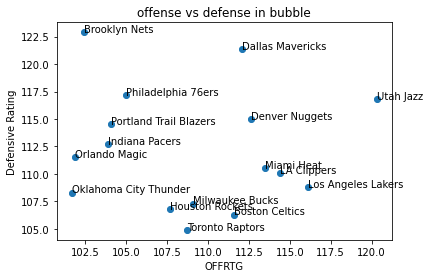

In [31]:
plt.scatter(res['OFFRTG'], res['DEFRTG'], alpha=.3)
plt.xlabel('Offensive Rating')
plt.ylabel('Defensive Rating')
plt.title('offense vs defense in bubble')
dax = res.set_index('OFFRTG')['DEFRTG'].plot(style='o')
label_point_orig(res['OFFRTG'], res['DEFRTG'], res['TEAM'], dax)

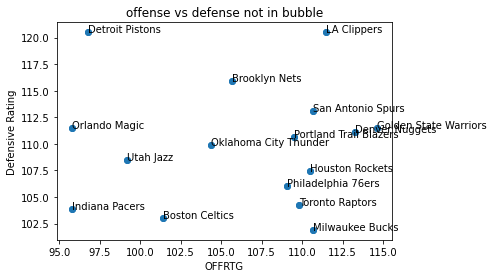

In [32]:
plt.scatter(playoffs2019['OFFRTG'], playoffs2019['DEFRTG'])
plt.xlabel("Offensive Rating")
plt.ylabel("Defensive Rating")
plt.title('offense vs defense not in bubble')
offdef = playoffs2019.set_index('OFFRTG')['DEFRTG'].plot(style = 'o')
label_point_orig(playoffs2019['OFFRTG'], playoffs2019['DEFRTG'], playoffs2019['TEAM'], offdef)

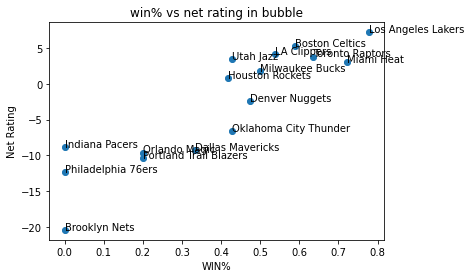

In [33]:
plt.scatter(res['WIN%'], res['NETRTG'], alpha=.3)
plt.xlabel('Winning Percentage')
plt.ylabel('Net Rating')
plt.title('win% vs net rating in bubble')
dax = res.set_index('WIN%')['NETRTG'].plot(style='o')
label_point_orig(res['WIN%'], res['NETRTG'], res['TEAM'], dax)

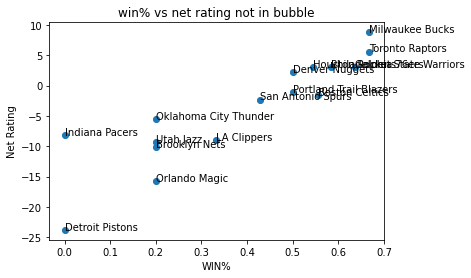

In [34]:
plt.scatter(playoffs2019['WIN%'], playoffs2019['NETRTG'], alpha=.3)
plt.xlabel('Winning Percentage')
plt.ylabel('Net Rating')
plt.title('win% vs net rating not in bubble')
dax = playoffs2019.set_index('WIN%')['NETRTG'].plot(style='o')
label_point_orig(playoffs2019['WIN%'], playoffs2019['NETRTG'], playoffs2019['TEAM'], dax)

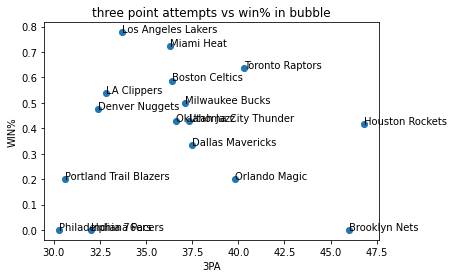

In [35]:
plt.scatter(res['3PA'], res['WIN%'], alpha=.3)
plt.xlabel('3PA')
plt.ylabel('WIN%')
plt.title('three point attempts vs win% in bubble')
dax = res.set_index('3PA')['WIN%'].plot(style='o')
label_point_orig(res['3PA'], res['WIN%'], res['TEAM'], dax)

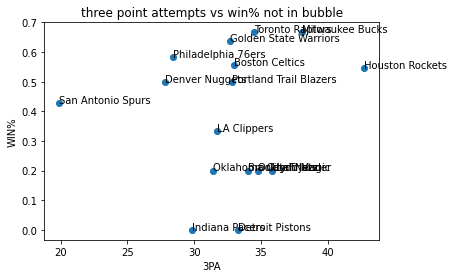

In [36]:
plt.scatter(playoffs2019['3PA'], playoffs2019['WIN%'], alpha=.3)
plt.xlabel('3PA')
plt.ylabel('WIN%')
plt.title('three point attempts vs win% not in bubble')
dax = playoffs2019.set_index('3PA')['WIN%'].plot(style='o')
label_point_orig(playoffs2019['3PA'], playoffs2019['WIN%'], playoffs2019['TEAM'], dax)

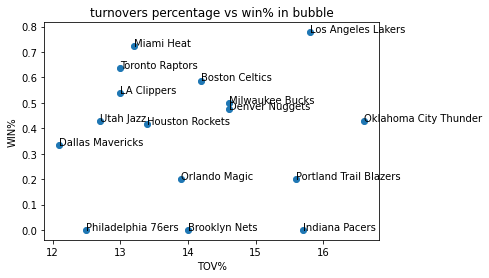

In [38]:
plt.scatter(res['TOV%'], res['WIN%'], alpha=.3)
plt.xlabel('TOV%')
plt.ylabel('WIN%')
plt.title('turnovers percentage vs win% in bubble')
dax = res.set_index('TOV%')['WIN%'].plot(style='o')
label_point_orig(res['TOV%'], res['WIN%'], res['TEAM'], dax)

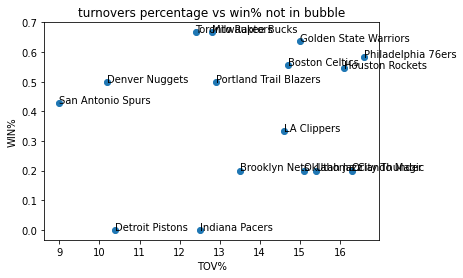

In [40]:
plt.scatter(playoffs2019['TOV%'], playoffs2019['WIN%'], alpha=.3)
plt.xlabel('TOV%')
plt.ylabel('WIN%')
plt.title('turnovers percentage vs win% not in bubble')
dax = playoffs2019.set_index('TOV%')['WIN%'].plot(style='o')
label_point_orig(playoffs2019['TOV%'], playoffs2019['WIN%'], playoffs2019['TEAM'], dax)

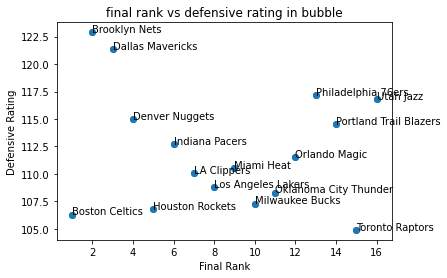

In [41]:
plt.scatter(res['Final Rank'], res['DEFRTG'])
plt.xlabel("Final Rank")
plt.ylabel("Defensive Rating")
plt.title('final rank vs defensive rating in bubble')
defrtg = res.set_index('Final Rank')['DEFRTG'].plot(style = 'o')
label_point_orig(res['Final Rank'], res['DEFRTG'], res['TEAM'], defrtg)


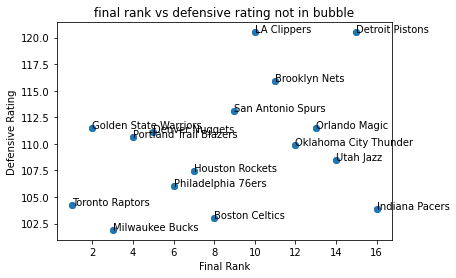

In [42]:
plt.scatter(playoffs2019['Final Rank'], playoffs2019['DEFRTG'])
plt.xlabel("Final Rank")
plt.ylabel("Defensive Rating")
plt.title('final rank vs defensive rating not in bubble')
defrtg = playoffs2019.set_index('Final Rank')['DEFRTG'].plot(style = 'o')
label_point_orig(playoffs2019['Final Rank'], playoffs2019['DEFRTG'], playoffs2019['TEAM'], defrtg)

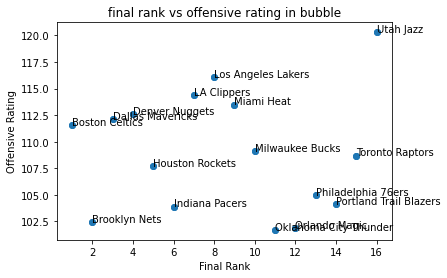

In [43]:
plt.scatter(res['Final Rank'], res['OFFRTG'])
plt.xlabel("Final Rank")
plt.ylabel("Offensive Rating")
plt.title('final rank vs offensive rating in bubble')
defrtg = res.set_index('Final Rank')['OFFRTG'].plot(style = 'o')
label_point_orig(res['Final Rank'], res['OFFRTG'], res['TEAM'], defrtg)


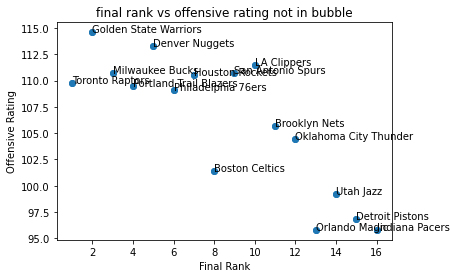

In [44]:
plt.scatter(playoffs2019['Final Rank'], playoffs2019['OFFRTG'])
plt.xlabel("Final Rank")
plt.ylabel("Offensive Rating")
plt.title('final rank vs offensive rating not in bubble')
defrtg = playoffs2019.set_index('Final Rank')['OFFRTG'].plot(style = 'o')
label_point_orig(playoffs2019['Final Rank'], playoffs2019['OFFRTG'], playoffs2019['TEAM'], defrtg)


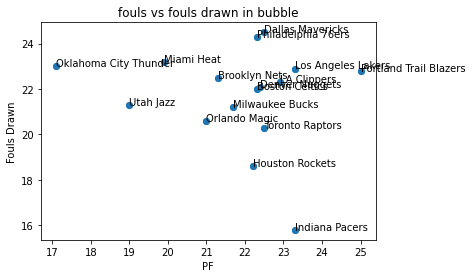

In [45]:
plt.scatter(res['PF'], res['PFD'])
plt.xlabel("Fouls")
plt.ylabel("Fouls Drawn")
plt.title('fouls vs fouls drawn in bubble')
fouls = res.set_index('PF')['PFD'].plot(style = 'o')
label_point_orig(res['PF'], res['PFD'], res['TEAM'], fouls)


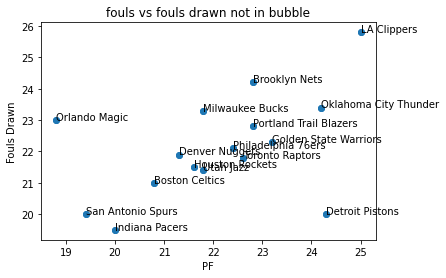

In [46]:
plt.scatter(playoffs2019['PF'], playoffs2019['PFD'])
plt.xlabel("Fouls")
plt.ylabel("Fouls Drawn")
plt.title('fouls vs fouls drawn not in bubble')
fouls = playoffs2019.set_index('PF')['PFD'].plot(style = 'o')
label_point_orig(playoffs2019['PF'], playoffs2019['PFD'], playoffs2019['TEAM'], fouls)


Text(0.5, 1.0, '3s made in bubble')

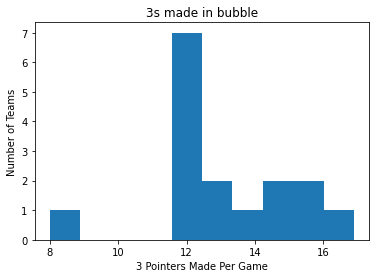

In [49]:
plt.hist(res["3PM"])
plt.xlabel("3 Pointers Made Per Game")
plt.ylabel("Number of Teams")
plt.title('3s made in bubble')

Text(0.5, 1.0, '3s made not in bubble')

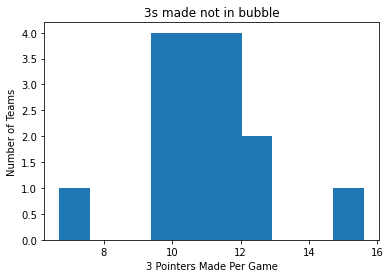

In [50]:
plt.hist(playoffs2019["3PM"])
plt.xlabel("3 Pointers Made Per Game")
plt.ylabel("Number of Teams")
plt.title('3s made not in bubble')

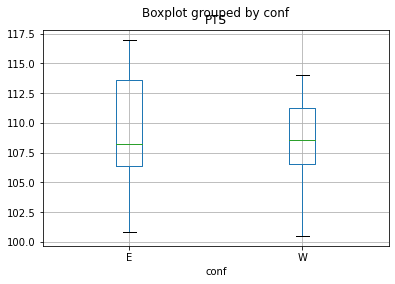

In [53]:
res.boxplot('PTS', by = 'conf')
#in bubble

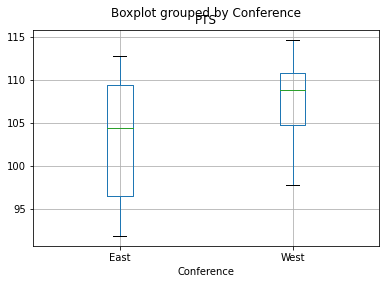

In [54]:
playoffs2019.boxplot('PTS', by = 'Conference')
#not in bubble

Text(0.5, 1.0, 'offensive rebounds in bubble')

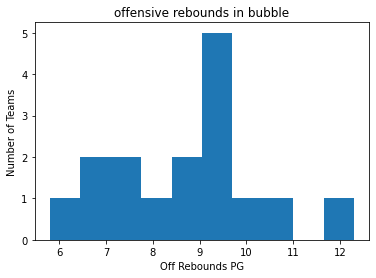

In [55]:
plt.hist(res["OREB"])
plt.xlabel("Off Rebounds PG")
plt.ylabel("Number of Teams")
plt.title('offensive rebounds in bubble')

Text(0.5, 1.0, 'offensive rebounds not in bubble')

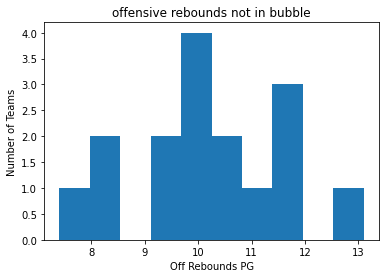

In [56]:
plt.hist(playoffs2019["OREB"])
plt.xlabel("Off Rebounds PG")
plt.ylabel("Number of Teams")
plt.title('offensive rebounds not in bubble')

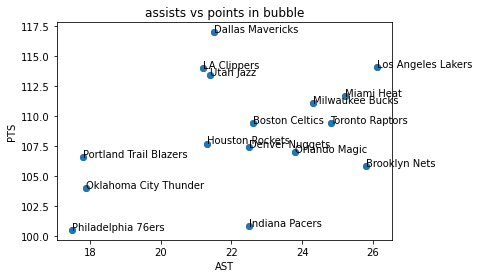

In [57]:
plt.scatter(res['AST'], res['PTS'])
plt.xlabel("AST")
plt.ylabel("PTS")
plt.title('assists vs points in bubble')
astpoints = res.set_index('AST')['PTS'].plot(style = 'o')
label_point_orig(res['AST'], res['PTS'], res['TEAM'], astpoints)

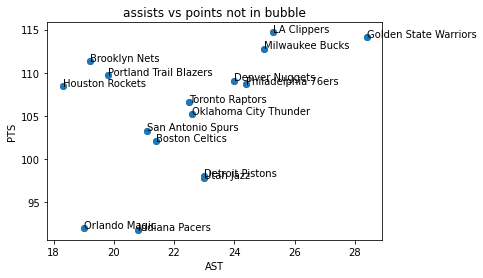

In [58]:
plt.scatter(playoffs2019['AST'], playoffs2019['PTS'])
plt.xlabel("AST")
plt.ylabel("PTS")
plt.title('assists vs points not in bubble')
astpoints = playoffs2019.set_index('AST')['PTS'].plot(style = 'o')
label_point_orig(playoffs2019['AST'], playoffs2019['PTS'], playoffs2019['TEAM'], astpoints)

Age, Salary, Experience in the bubble

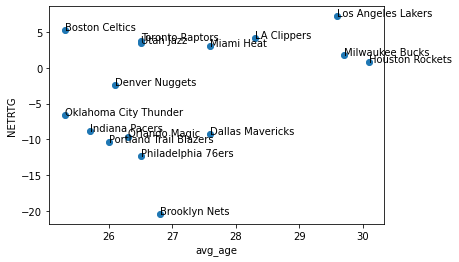

In [59]:
plt.scatter(res['avg_age'], res['NETRTG'], alpha=.3)
plt.xlabel('avg_age')
plt.ylabel('NETRTG')
dax = res.set_index('avg_age')['NETRTG'].plot(style='o')
label_point_orig(res['avg_age'], res['NETRTG'], res['TEAM'], dax)

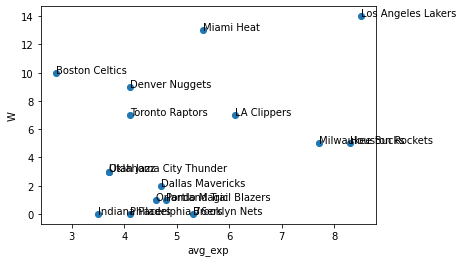

In [60]:
plt.scatter(res['avg_exp'], res['W'], alpha=.3)
plt.xlabel('avg_exp')
plt.ylabel('W')
dax = res.set_index('avg_exp')['W'].plot(style='o')
label_point_orig(res['avg_exp'], res['W'], res['TEAM'], dax)

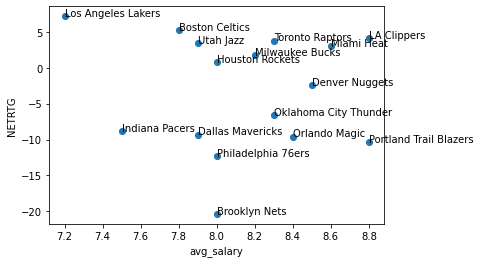

In [61]:
plt.scatter(res['avg_salary'], res['NETRTG'], alpha=.3)
plt.xlabel('avg_salary')
plt.ylabel('NETRTG')
dax = res.set_index('avg_salary')['NETRTG'].plot(style='o')
label_point_orig(res['avg_salary'], res['NETRTG'], res['TEAM'], dax)

The following analysis compares 2019-20 regular season: Inside Bubble (in Orlando, after Covid) vs Outside Bubble (traditional, before covid)
<br> Regular season from October to March, 60ish games
<br> Regular season from June to present, in bubble, 8 games

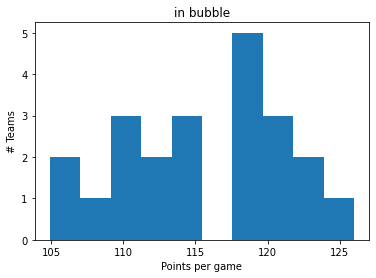

In [62]:
plt.hist(bubble_reg['PTS'])
plt.xlabel('Points per game')
plt.ylabel('# Teams')
plt.title('in bubble')
plt.show()

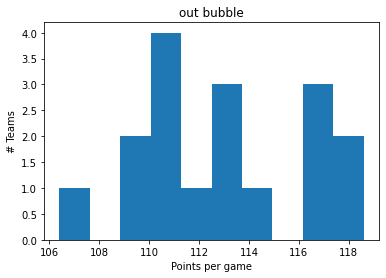

In [63]:
plt.hist(stats['PTS'])
plt.xlabel('Points per game')
plt.ylabel('# Teams')
plt.title('out bubble')
plt.show()

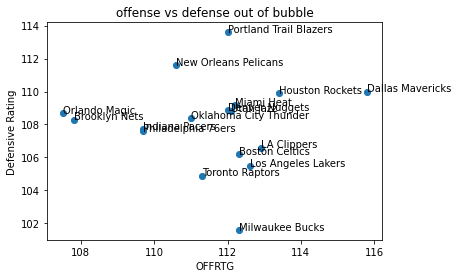

In [70]:
plt.scatter(stats['OFFRTG'], stats['DEFRTG'], alpha=.3)
plt.xlabel('Offensive Rating')
plt.ylabel('Defensive Rating')
plt.title('offense vs defense out of bubble')
dax = stats.set_index('OFFRTG')['DEFRTG'].plot(style='o')
label_point_orig(stats['OFFRTG'], stats['DEFRTG'], stats['TEAM'], dax)

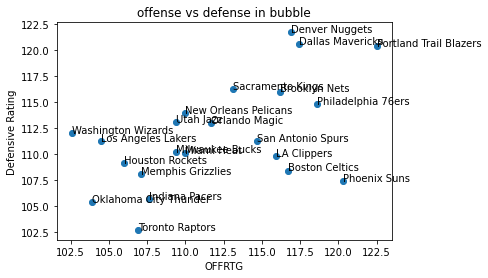

In [71]:
plt.scatter(bubble_reg['OFFRTG'], bubble_reg['DEFRTG'], alpha=.3)
plt.xlabel('Offensive Rating')
plt.ylabel('Defensive Rating')
plt.title('offense vs defense in bubble')
dax = bubble_reg.set_index('OFFRTG')['DEFRTG'].plot(style='o')
label_point_orig(bubble_reg['OFFRTG'], bubble_reg['DEFRTG'], bubble_reg['TEAM'], dax)

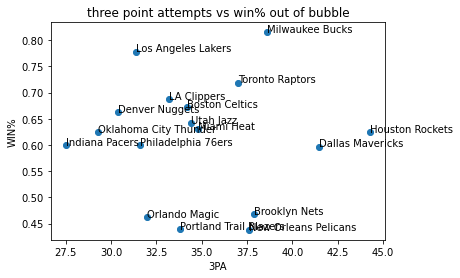

In [72]:
plt.scatter(stats['3PA'], stats['WIN%'], alpha=.3)
plt.xlabel('3PA')
plt.ylabel('WIN%')
plt.title('three point attempts vs win% out of bubble')
dax = stats.set_index('3PA')['WIN%'].plot(style='o')
label_point_orig(stats['3PA'], stats['WIN%'], stats['TEAM'], dax)

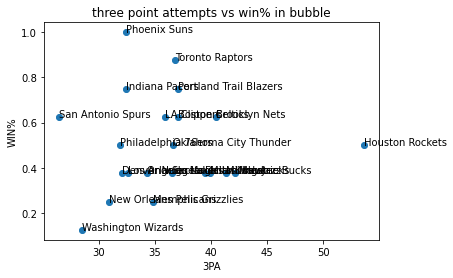

In [73]:
plt.scatter(bubble_reg['3PA'], bubble_reg['WIN%'], alpha=.3)
plt.xlabel('3PA')
plt.ylabel('WIN%')
plt.title('three point attempts vs win% in bubble')
dax = bubble_reg.set_index('3PA')['WIN%'].plot(style='o')
label_point_orig(bubble_reg['3PA'], bubble_reg['WIN%'], bubble_reg['TEAM'], dax)

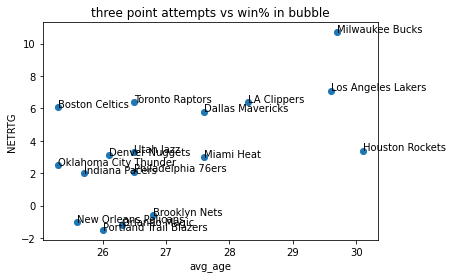

In [75]:
plt.scatter(stats['avg_age'], stats['NETRTG'], alpha=.3)
plt.xlabel('avg_age')
plt.ylabel('NETRTG')
plt.title('three point attempts vs win% out of bubble')
dax = stats.set_index('avg_age')['NETRTG'].plot(style='o')
label_point_orig(stats['avg_age'], stats['NETRTG'], stats['TEAM'], dax)

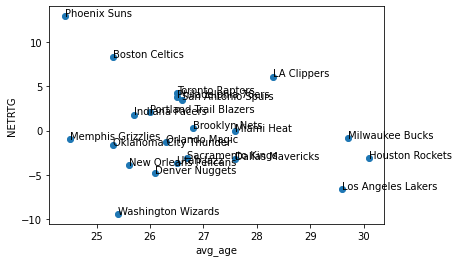

In [74]:
plt.scatter(bubble_reg['avg_age'], bubble_reg['NETRTG'], alpha=.3)
plt.xlabel('avg_age')
plt.ylabel('NETRTG')
plt.title('average age vs net rating in bubble')
dax = bubble_reg.set_index('avg_age')['NETRTG'].plot(style='o')
label_point_orig(bubble_reg['avg_age'], bubble_reg['NETRTG'], bubble_reg['TEAM'], dax)

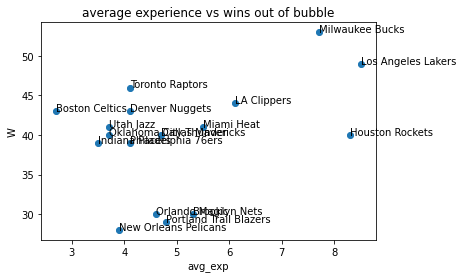

In [77]:
plt.scatter(stats['avg_exp'], stats['W'], alpha=.3)
plt.xlabel('avg_exp')
plt.ylabel('W')
plt.title('average experience vs wins out of bubble')
dax = stats.set_index('avg_exp')['W'].plot(style='o')
label_point_orig(stats['avg_exp'], stats['W'], stats['TEAM'], dax)

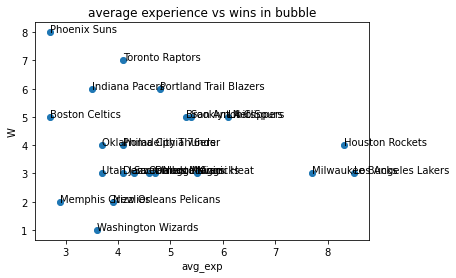

In [78]:
plt.scatter(bubble_reg['avg_exp'], bubble_reg['W'], alpha=.3)
plt.xlabel('avg_exp')
plt.ylabel('W')
plt.title('average experience vs wins in bubble')
dax = bubble_reg.set_index('avg_exp')['W'].plot(style='o')
label_point_orig(bubble_reg['avg_exp'], bubble_reg['W'], bubble_reg['TEAM'], dax)

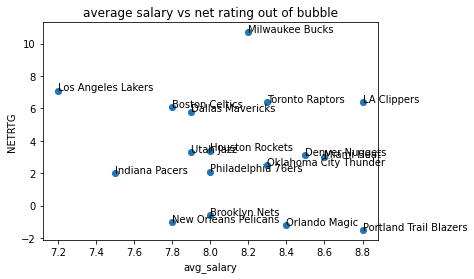

In [79]:
plt.scatter(stats['avg_salary'], stats['NETRTG'], alpha=.3)
plt.xlabel('avg_salary')
plt.ylabel('NETRTG')
plt.title('average salary vs net rating out of bubble')
dax = stats.set_index('avg_salary')['NETRTG'].plot(style='o')
label_point_orig(stats['avg_salary'], stats['NETRTG'], stats['TEAM'], dax)

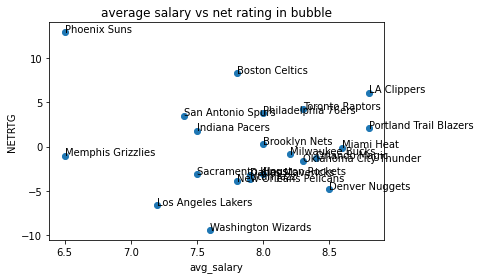

In [80]:
plt.scatter(bubble_reg['avg_salary'], bubble_reg['NETRTG'], alpha=.3)
plt.xlabel('avg_salary')
plt.ylabel('NETRTG')
plt.title('average salary vs net rating in bubble')
dax = bubble_reg.set_index('avg_salary')['NETRTG'].plot(style='o')
label_point_orig(bubble_reg['avg_salary'], bubble_reg['NETRTG'], bubble_reg['TEAM'], dax)

In [81]:
bubble_reg[ ["W", "PTS"] ].corr(), stats[ ["W", "PTS"] ].corr()

(            W       PTS
 W    1.000000  0.399877
 PTS  0.399877  1.000000,
             W       PTS
 W    1.000000  0.361203
 PTS  0.361203  1.000000)

In [82]:
bubble_reg[ ["W", "FG%"] ].corr(), stats[ ["W", "FG%"] ].corr()

(            W       FG%
 W    1.000000  0.380048
 FG%  0.380048  1.000000,
             W       FG%
 W    1.000000  0.627556
 FG%  0.627556  1.000000)

In [83]:
bubble_reg[ ["W", "PIE"] ].corr(), stats[ ["W", "PIE"] ].corr()

(          W     PIE
 W    1.0000  0.7625
 PIE  0.7625  1.0000,
           W     PIE
 W    1.0000  0.9117
 PIE  0.9117  1.0000)

In [84]:
bubble_reg[ ["W", "PIE"] ].cov(), stats[ ["W", "PIE"] ].cov()

(            W       PIE
 W    2.952381  3.966667
 PIE  3.966667  9.166407,
              W        PIE
 W    49.220588  13.326103
 PIE  13.326103   4.340662)

Text(0.5, 1.0, '3s made in bubble')

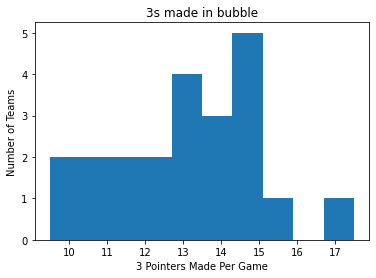

In [86]:
plt.hist(bubble_reg["3PM"])
plt.xlabel("3 Pointers Made Per Game")
plt.ylabel("Number of Teams")
plt.title('3s made in bubble')

Text(0.5, 1.0, '3s made in bubble')

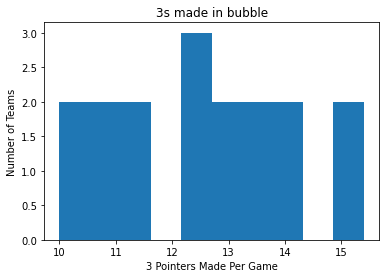

In [87]:
plt.hist(stats["3PM"])
plt.xlabel("3 Pointers Made Per Game")
plt.ylabel("Number of Teams")
plt.title('3s made in bubble')